# Analyse exploratoire des données(Exploratory Analysis)

In [326]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from torch.utils.data import TensorDataset, DataLoader
import torch.nn as nn
import torch

In [327]:
# Charger les données
data = pd.read_csv('20221002_ECG_sample.csv')

In [328]:
# Afficher la forme des données
print(data.shape)

(10, 42)


In [329]:
# Afficher un résumé statistique
data.describe()

,Unnamed: 0.2,Unnamed: 0,Unnamed: 0.1,patientid,age,VentricularRate,AtrialRate,PRInterval,QRSDuration,QTInterval,...,QOffset,POnset,POffset,TOffset,ECGSampleBase,ECGSampleExponent,QTcFrederica,Location,AnalysisSoftware,diagnosis
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,10.000000,10.000000,...,10.000000,9.00000,9.000000,10.000000,10.0,10.0,10.000000,10.00000,10.000000,10.000000
mean,93171.100000,93171.100000,93171.100000,383668.400000,64.100000,70.900000,71.700000,178.444444,124.200000,423.400000,...,274.300000,123.00000,174.333333,423.900000,500.0,0.0,443.600000,26.20000,240.600000,0.300000
std,69930.301842,69930.301842,69930.301842,199433.082033,8.736259,15.687575,15.384335,42.740821,31.615046,35.377959,...,17.159707,23.16247,26.935107,21.911184,0.0,0.0,33.427201,19.29191,2.065591,0.483046
min,7269.000000,7269.000000,7269.000000,97775.000000,49.000000,48.000000,48.000000,134.000000,84.000000,376.000000,...,257.000000,95.00000,131.000000,390.000000,500.0,0.0,384.000000,3.00000,239.000000,0.000000
25%,24558.000000,24558.000000,24558.000000,205813.750000,61.250000,62.000000,62.500000,144.000000,96.500000,389.500000,...,262.500000,102.00000,152.000000,408.500000,500.0,0.0,420.250000,11.25000,239.000000,0.000000
50%,106336.000000,106336.000000,106336.000000,387129.000000,63.000000,65.500000,68.500000,164.000000,122.000000,424.000000,...,268.000000,133.00000,184.000000,427.000000,500.0,0.0,443.500000,21.50000,239.000000,0.000000
75%,132123.500000,132123.500000,132123.500000,584391.750000,71.250000,85.000000,85.000000,216.000000,150.500000,455.500000,...,282.000000,138.00000,194.000000,440.750000,500.0,0.0,474.500000,46.25000,243.000000,0.750000
max,211724.000000,211724.000000,211724.000000,597738.000000,76.000000,96.000000,96.000000,256.000000,170.000000,468.000000,...,304.000000,159.00000,211.000000,457.000000,500.0,0.0,482.000000,52.00000,243.000000,1.000000


In [330]:
# Affichager des informations sur DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 42 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0.2                10 non-null     int64  
 1   Unnamed: 0                  10 non-null     int64  
 2   Unnamed: 0.1                10 non-null     int64  
 3   patientid                   10 non-null     int64  
 4   age                         10 non-null     int64  
 5   dob                         10 non-null     object 
 6   gender                      10 non-null     object 
 7   VentricularRate             10 non-null     int64  
 8   AtrialRate                  10 non-null     int64  
 9   PRInterval                  9 non-null      float64
 10  QRSDuration                 10 non-null     int64  
 11  QTInterval                  10 non-null     int64  
 12  QTCorrected                 10 non-null     int64  
 13  PAxis                       8 non-null

In [331]:
# Compter le nombre de valeurs nulles dans chaque colonne
data.isnull().sum()

Unnamed: 0.2                  0
Unnamed: 0                    0
Unnamed: 0.1                  0
patientid                     0
age                           0
dob                           0
gender                        0
VentricularRate               0
AtrialRate                    0
PRInterval                    1
QRSDuration                   0
QTInterval                    0
QTCorrected                   0
PAxis                         2
RAXis                         0
TAxis                         0
QRSCount                      0
QOnset                        0
QOffset                       0
POnset                        1
POffset                       1
TOffset                       0
ECGSampleBase                 0
ECGSampleExponent             0
QTcFrederica                  0
Location                      0
LocationName                  0
RoomID                        0
AcquisitionDate               0
AcquisitionTime               0
Status                        0
Acquisit

In [332]:
# Remplacer les valeurs nulles par zéro dans le DataFrame
data=data.fillna(0)

# Visualisation et prétraitement des données(Data visualization and pre-processing)

In [333]:
def lire_fichier_ecg(chemin):
    """
      Charge les données ECG à partir d'un fichier au format numpy.
      Parameters:
      - chemin (str): Chemin du fichier à charger.
      Returns:
      - valeurs (numpy.ndarray or None): Tableau de valeurs ECG si la lecture est réussie, sinon None.
      """
       
      
    try:
        # np.load pour charger les données depuis le chemin 
        valeurs = np.load(chemin)
        return valeurs
    except Exception as e:
        print(f"Erreur lors de la lecture du fichier {chemin}: {str(e)}")
        return None

In [360]:
def lire_ecg_de_dataframe(df, colonne):
    """
    Applique la fonction de lecture de fichier ECG sur une colonne spécifique d'un DataFrame.

    Parameters:
    - df (pandas.DataFrame): Le DataFrame contenant les données ECG.
    - colonne (str): Le nom de la colonne contenant les chemins des fichiers ECG.

    Returns:
    - df (pandas.DataFrame): Le DataFrame mis à jour avec les valeurs ECG chargées.
    """
    # Appliquer la fonction de lecture sur une colonne spécifique
    df[colonne] = df[colonne].apply(lire_fichier_ecg)
    return df


In [335]:
# Appliquer la fonction de lecture de fichier ECG sur la colonne 'ecg_output_path'
data_transformed = lire_ecg_de_dataframe(data, 'ecg_output_path')

In [336]:
# Séparer les colonnes catégorielles et numériques du DataFrame
data_transformed_categorical=data_transformed[['dob','gender','LocationName','RoomID','AcquisitionDate','AcquisitionTime','Status','AcquisitionDevice','ReferringMDLastName','AcquisitionSoftwareVersion','Diagnosis','Original_Diagnosis','xml_path','predictions','recommendations']]
data_transformed_numerical=data_transformed[['Unnamed: 0.2','Unnamed: 0','Unnamed: 0.1','patientid','age','VentricularRate','AtrialRate','PRInterval','QRSDuration','QTInterval','QTCorrected','PAxis','RAXis','TAxis','QRSCount','QOnset','QOffset','POnset','POffset','TOffset','ECGSampleBase','ECGSampleExponent','QTcFrederica','Location','AnalysisSoftware','diagnosis']]

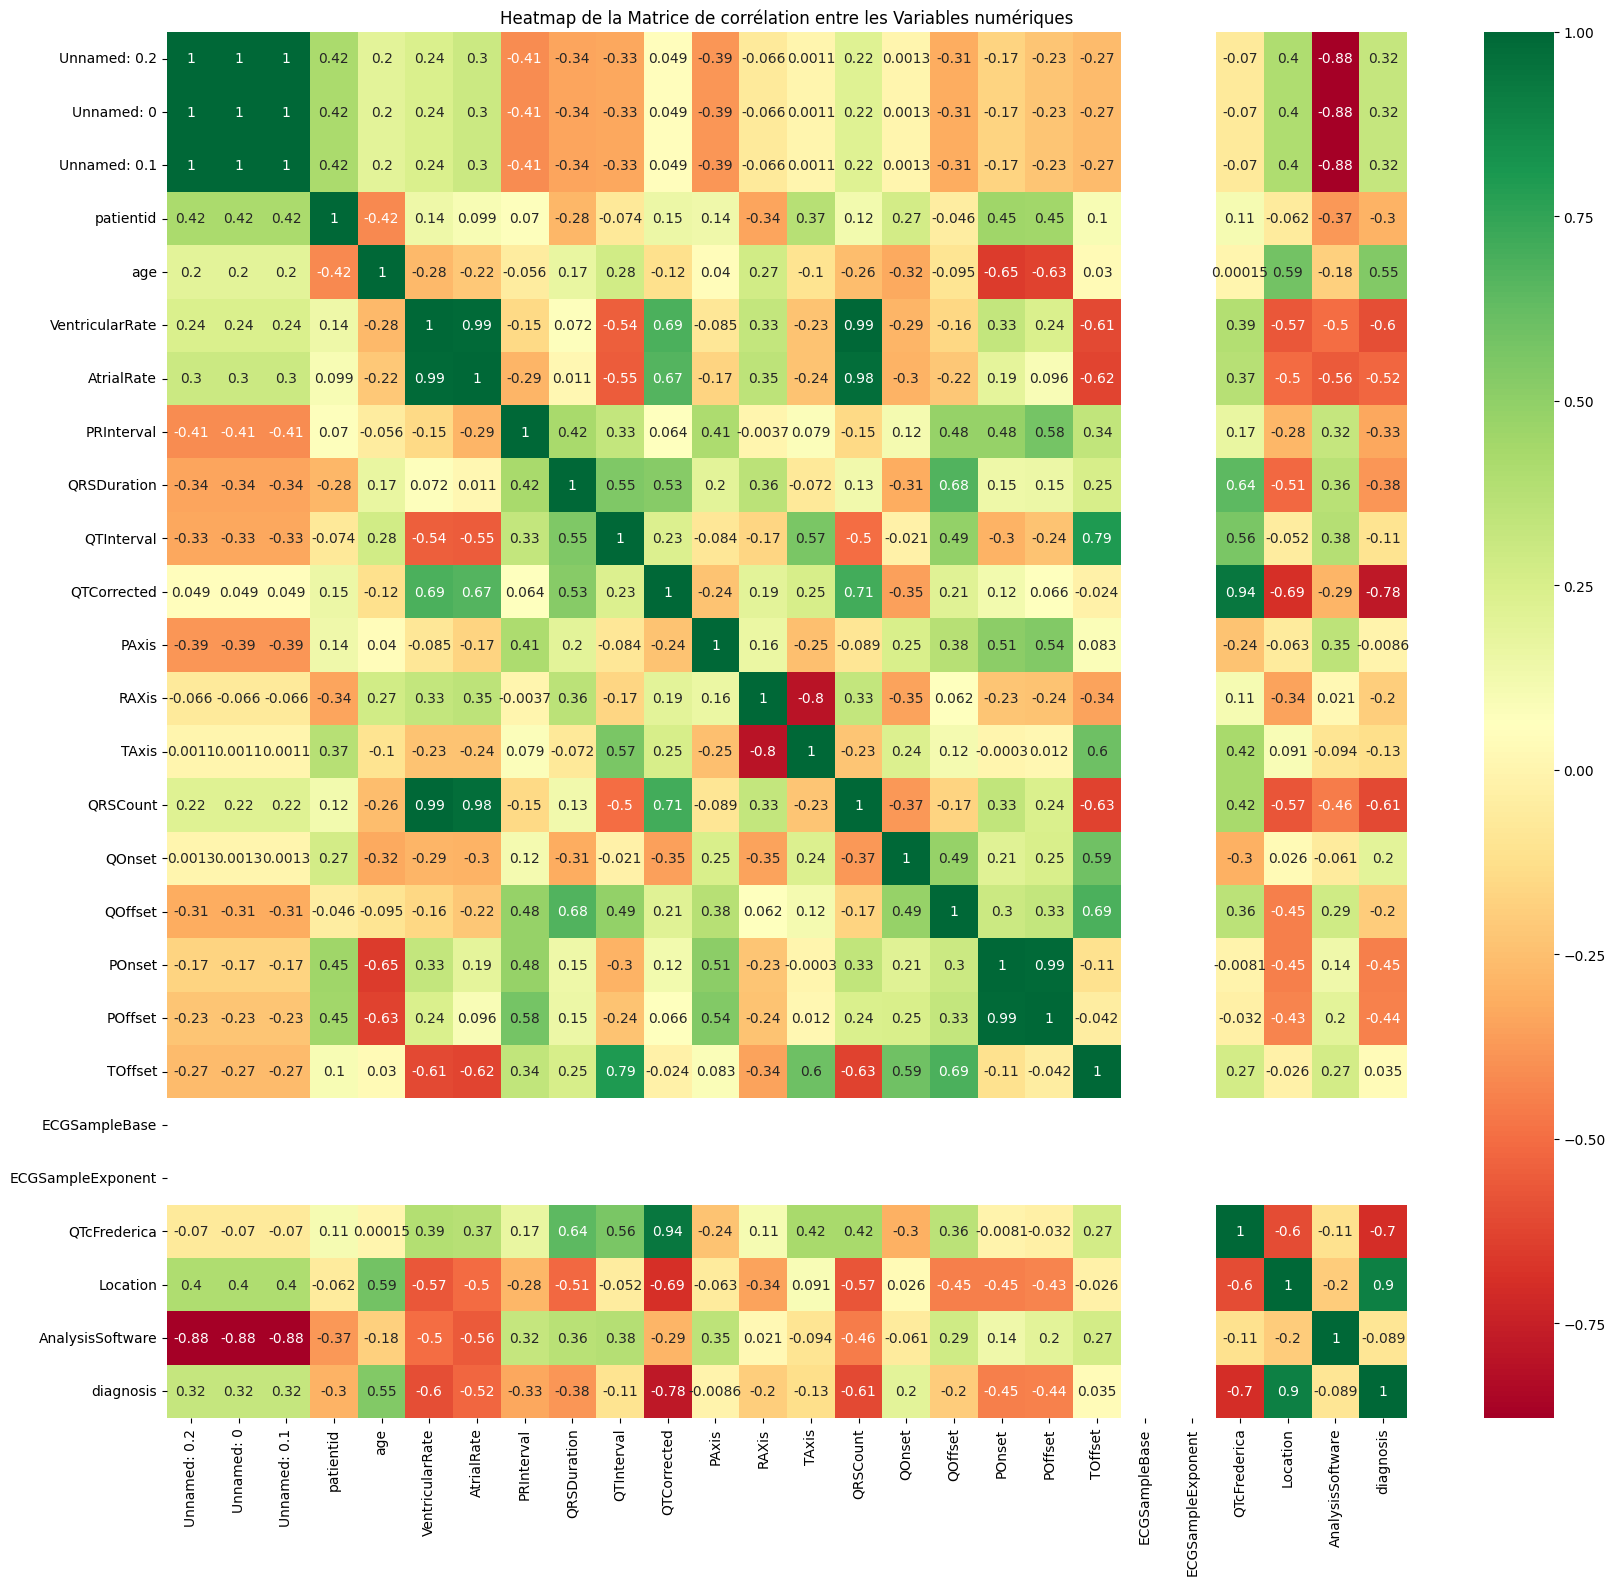

In [337]:
# Calculer la matrice de corrélation entre les variables numériques
corr = data_transformed_numerical.corr()

# Afficher le heatmap de la matrice de corrélation
plt.figure(figsize=(20, 18))
sns.heatmap(corr, annot=True, cmap='RdYlGn')
plt.title("Heatmap de la Matrice de corrélation entre les Variables numériques")
plt.show()


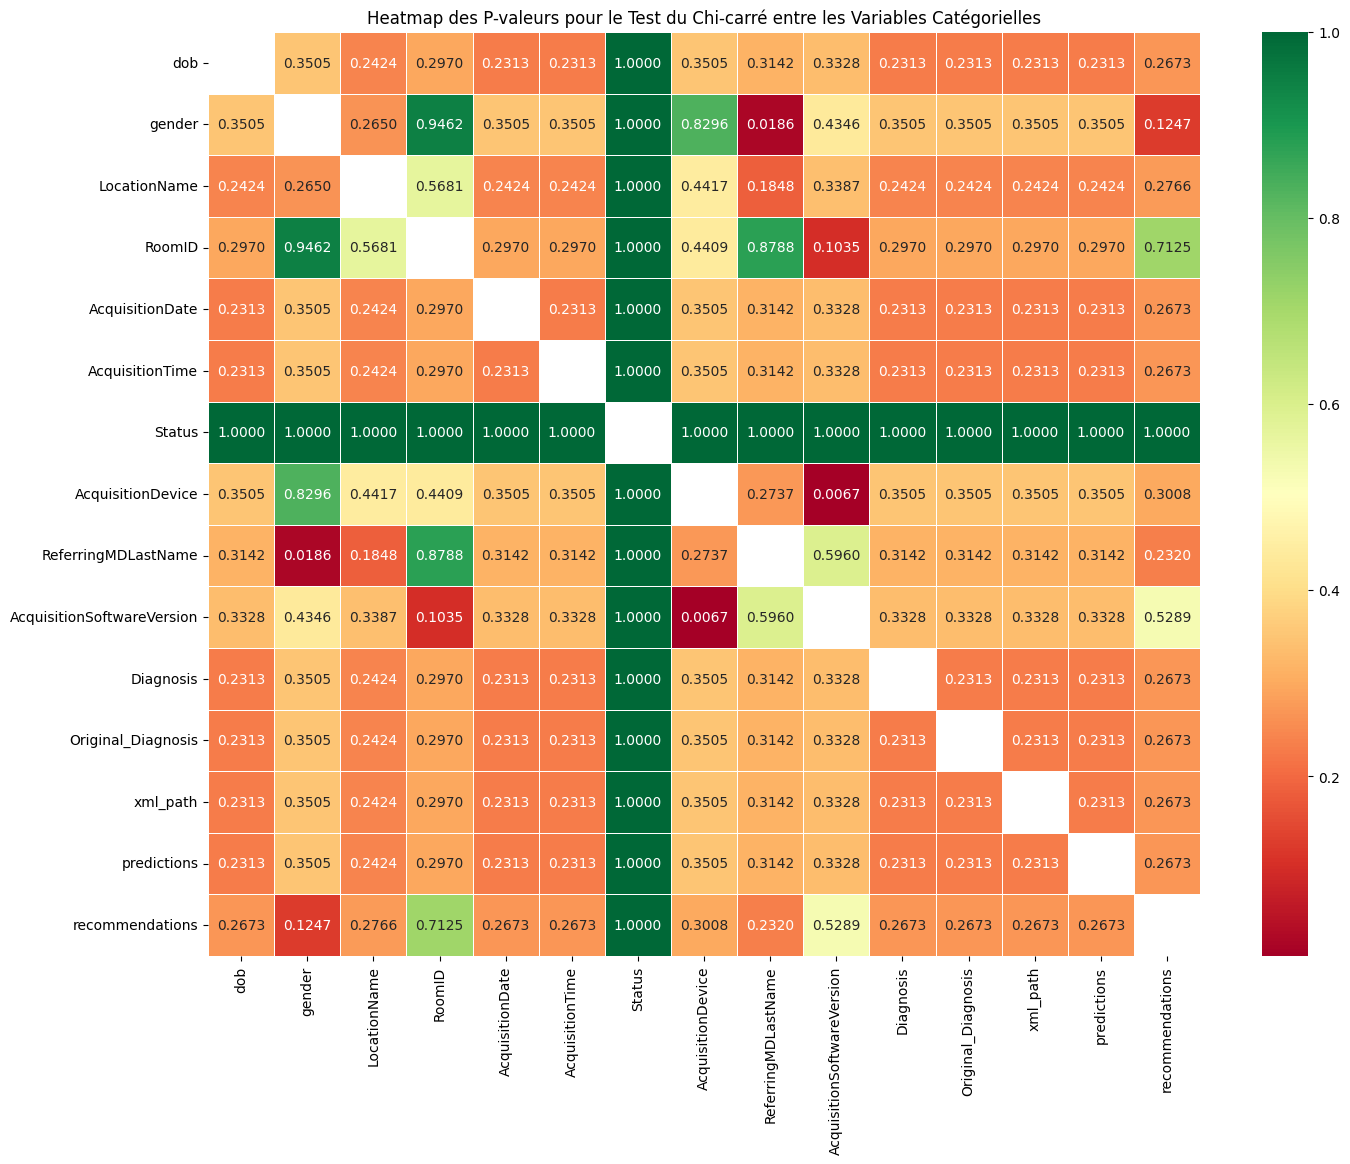

In [338]:
# Convertir toutes les colonnes catégorielles en chaînes de caractères
data_transformed_categorical = data_transformed_categorical.astype(str)

# Initialiser les matrices pour stocker les résultats du test du chi-carré
chi2_matrix = pd.DataFrame(index=data_transformed_categorical.columns, columns=data_transformed_categorical.columns)
p_values_matrix = pd.DataFrame(index=chi2_matrix.index, columns=chi2_matrix.columns)

# Appliquer le test du chi-carré entre toutes les paires de colonnes catégorielles
for col1 in data_transformed_categorical.columns:
    for col2 in data_transformed_categorical.columns:
        if col1 == col2:
            chi2_matrix.loc[col1, col2] = 0  # Diagonale principale, on la met à zéro
        else:
            contingency_table = pd.crosstab(data_transformed_categorical[col1], data_transformed_categorical[col2])
            chi2, p_value, _, _ = chi2_contingency(contingency_table)
            chi2_matrix.loc[col1, col2] = chi2
            p_values_matrix.loc[col1, col2] = p_value

# Convertir les p-valeurs en float
p_values_matrix = p_values_matrix.astype(float)

# Créer une heatmap des p-valeurs
plt.figure(figsize=(16, 12))
sns.heatmap(p_values_matrix, annot=True, fmt=".4f", cmap="RdYlGn", linewidths=.5)
plt.title("Heatmap des P-valeurs pour le Test du Chi-carré entre les Variables Catégorielles")
plt.show()


In [339]:
# Calculer la nouvelle variable 'PRSegment'
data_transformed['PRSegment'] = data_transformed['QOnset'] - data_transformed['POffset']

In [340]:
# Instancier le LabelEncoder
label_encoder = LabelEncoder()
# Appliquer l'encodage à la colonne 'gender'
data_transformed['gender'] = label_encoder.fit_transform(data_transformed['gender'].astype(str))
# Afficher les valeurs encodées
print(data_transformed['gender'].unique())

[1 0]


In [341]:
# Sélectionner les colonnes pertinentes dans le DataFrame
data_transformed = data_transformed[['gender', 'age', 'POnset', 'PRInterval', 'PAxis', 'PRSegment', 'QOffset', 'QRSDuration',
                                     'QRSCount', 'QTInterval', 'QTCorrected', 'TAxis', 'TOffset', 'ecg_output_path',
                                     'Location', 'diagnosis']]

# Supprimer les colonnes avec une forte corrélation.
# Note: La suppression de colonnes fortement corrélées est effectuée en utilisant une analyse de corrélation.

In [342]:
# Afficher le DataFrame après la sélection et la suppression des colonnes
print(data_transformed)

   gender  age  POnset  PRInterval  PAxis  PRSegment  QOffset  QRSDuration  \
0       1   55   159.0       144.0   31.0       20.0      304          146   
1       1   63   139.0       162.0   34.0       23.0      267           94   
2       1   62   138.0       164.0   61.0       26.0      262           84   
3       1   49   138.0       136.0   15.0       15.0      258          104   
4       1   63    95.0       256.0   38.0       72.0      302          158   
5       1   74     0.0         0.0    0.0      212.0      257           90   
6       1   76   106.0       220.0   57.0       58.0      284          136   
7       1   75    97.0       174.0   23.0       53.0      269          170   
8       1   63   102.0       216.0    0.0       58.0      264          108   
9       0   61   133.0       134.0   47.0       16.0      276          152   

   QRSCount  QTInterval  QTCorrected  TAxis  TOffset  \
0        14         422          507    151      442   
1        10         380      

Accuracy: 0.5


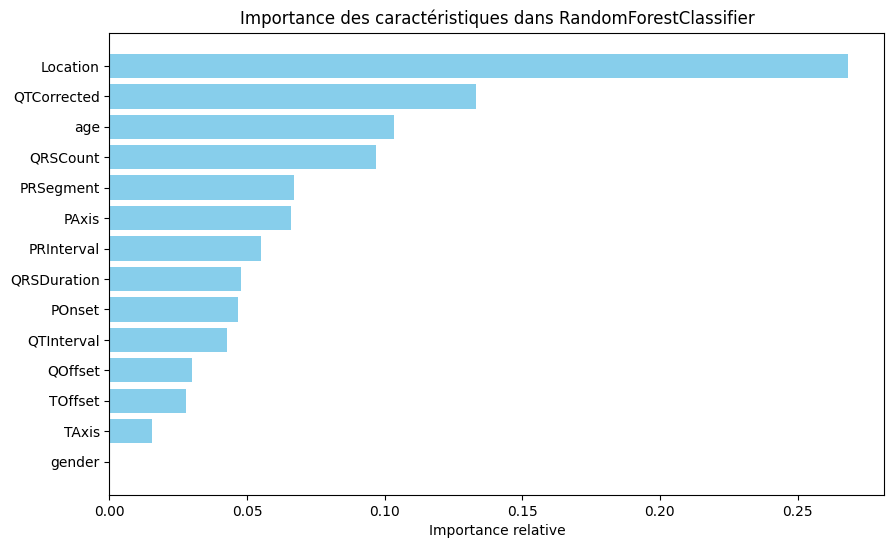

In [343]:
"""  l'importance des variables ("Feature Importance") """
# Sélection des colonnes à utiliser comme caractéristiques (features)
features = ['gender','age','POnset','PRInterval','PAxis','PRSegment','QOffset','QRSDuration','QRSCount','QTInterval','QTCorrected','TAxis','TOffset','Location']

# Séparation des données en caractéristiques (X) et variable cible (y)
X = data_transformed[features]
y = data_transformed['diagnosis']

# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialisation du modèle RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Entraînement du modèle
classifier.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = classifier.predict(X_test)

# Calcul de l'exactitude (accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Extraction de l'importance des caractéristiques
feature_importance = classifier.feature_importances_

# Création d'un DataFrame pour visualiser l'importance des caractéristiques
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)
# Créer un diagramme à barres horizontales pour afficher l'importance des caractéristiques
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance relative')
plt.title('Importance des caractéristiques dans RandomForestClassifier')
plt.show()

Accuracy (SVM): 0.0


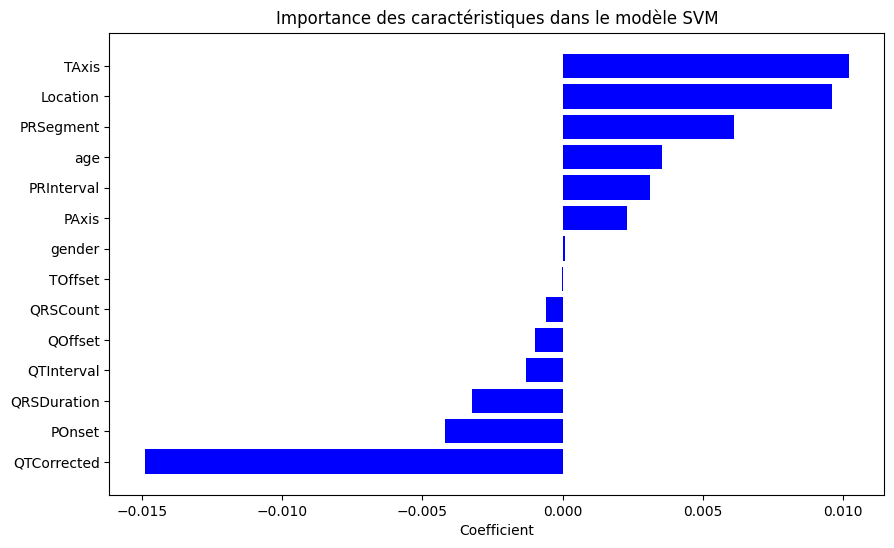

In [344]:
# Initialisation du modèle SVM (utilisation d'un noyau linéaire)
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)

# Entraînement du modèle SVM
svm_classifier.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred_svm = svm_classifier.predict(X_test)

# Calcul de l'exactitude (accuracy)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'Accuracy (SVM): {accuracy_svm}')

# Extraction des coefficients du modèle SVM
svm_coefficients = svm_classifier.coef_[0]

# Création d'un DataFrame pour visualiser l'importance des caractéristiques
svm_feature_importance_df = pd.DataFrame({'Feature': features, 'Coefficient': svm_coefficients})
svm_feature_importance_df = svm_feature_importance_df.sort_values(by='Coefficient', ascending=True)



# Affichage du graphique à barres pour l'importance des caractéristiques
plt.figure(figsize=(10, 6))
plt.barh(svm_feature_importance_df['Feature'], svm_feature_importance_df['Coefficient'], color='b', align='center')
plt.xlabel('Coefficient')
plt.title('Importance des caractéristiques dans le modèle SVM')
plt.show()

In [345]:
# Afficher la forme (shape) de la première entrée dans la colonne 'ecg_output_path'
data_transformed['ecg_output_path'][0].shape

(2500, 12, 1)

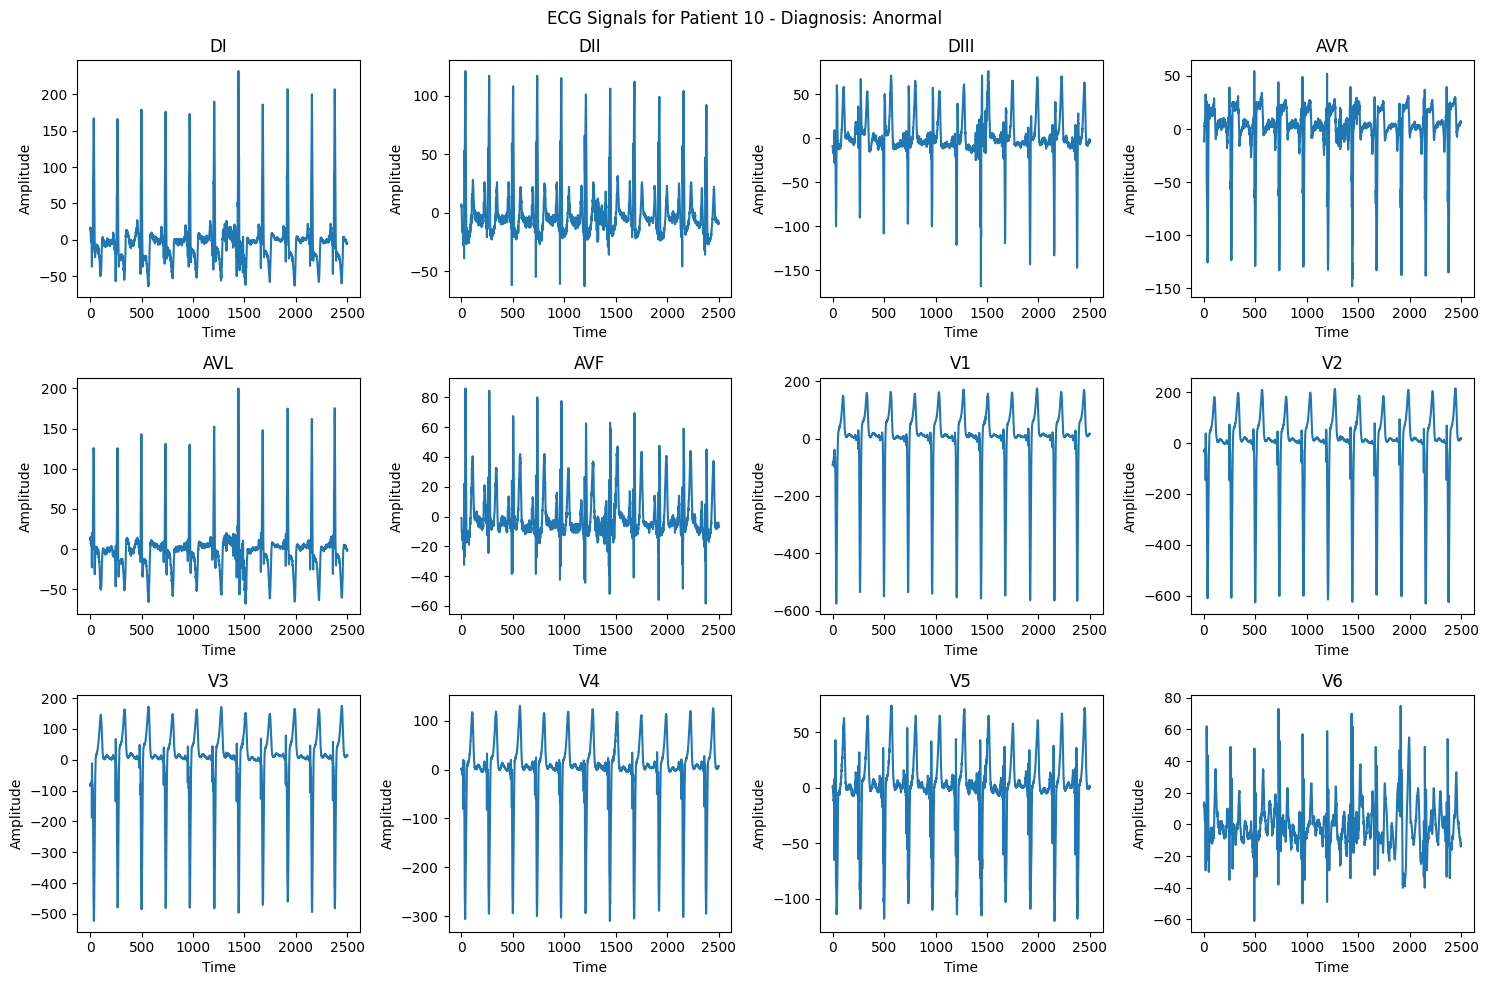

In [346]:
# Définir les noms des 12 dérivations
name = ['DI', 'DII', 'DIII', 'AVR', 'AVL', 'AVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']

# Sélectionner un patient spécifique par son index
patient_index = 9
row = data_transformed.iloc[patient_index]

# Récupérer les données de l'attribut 'ecg_output_path' du patient
data_to_plot = row['ecg_output_path']

# Affichage de l'étiquette de diagnostic
diagnosis_label = 'Anormal' if row['diagnosis'] == 0 else 'Normal'

# Créer une seule figure pour afficher les 12 courbes
plt.figure(figsize=(15, 10))

# Boucle pour chaque courbe dans les données
for i in range(data_to_plot.shape[1]):
    # Obtenir une seule courbe
    single_curve = data_to_plot[:, i, 0]

    # Ajouter un subplot pour chaque courbe
    plt.subplot(3, 4, i + 1)
    plt.plot(single_curve, label='ECG Signal')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.title(name[i])

# Ajouter un titre global à la figure
plt.suptitle(f"ECG Signals for Patient {patient_index + 1} - Diagnosis: {diagnosis_label}")
plt.tight_layout()
plt.show()


In [347]:
"""Objectif : Générer des données aléatoires et remplir par le signal a partir de colone 'ecg_output_path' ,
chaque ligne de data est le signal de son diagnosis ECG et les intégrer dans le DataFrame existant data_transformed.
"""
# Créer un DataFrame avec des données aléatoires de dimensions 10x30000
data = np.random.rand(10, 30000)
data_sig = pd.DataFrame(data)
# Définir les noms de colonnes pour data_sig
col_names = [f'signal{i+1}' for i in range(data_sig.shape[1])]

# Renommer les colonnes de data_sig
data_sig.columns = col_names
# Boucle sur les lignes du DataFrame
for z in range(10):
    # Supposons que vous ayez une colonne 'ecg_output_path' dans data_transformed
    # Cela peut nécessiter d'être ajusté en fonction de la structure réelle de vos données
    # Si vous n'avez pas une telle colonne, vous devrez ajuster cette partie en conséquence
    a = data_transformed['ecg_output_path'][z][:].T.squeeze()

    # Initialiser une matrice N de dimensions (12, 2500) avec des zéros
    N = np.zeros((12, 2500))

    # Remplir la matrice N à partir des données de 'a'
    for i in range(12):
        for j in range(2500):
            N[i][j] = a[i][j]

    # Aplatir la matrice N pour obtenir un tableau unidimensionnel
    b = N.flatten()

    # Remplacer la ligne 'z' du DataFrame par le tableau aplatit 'b'
    data_sig.loc[z] = b

# Concaténer data_transformed avec data_sig
data_transformed = pd.concat([data_transformed, data_sig], axis=1)

# Afficher le DataFrame résultant
print(data_transformed)


   gender  age  POnset  PRInterval  PAxis  PRSegment  QOffset  QRSDuration  \
0       1   55   159.0       144.0   31.0       20.0      304          146   
1       1   63   139.0       162.0   34.0       23.0      267           94   
2       1   62   138.0       164.0   61.0       26.0      262           84   
3       1   49   138.0       136.0   15.0       15.0      258          104   
4       1   63    95.0       256.0   38.0       72.0      302          158   
5       1   74     0.0         0.0    0.0      212.0      257           90   
6       1   76   106.0       220.0   57.0       58.0      284          136   
7       1   75    97.0       174.0   23.0       53.0      269          170   
8       1   63   102.0       216.0    0.0       58.0      264          108   
9       0   61   133.0       134.0   47.0       16.0      276          152   

   QRSCount  QTInterval  ...  signal29991  signal29992  signal29993  \
0        14         422  ...        -28.0        -28.0        -28.0   

In [348]:
"""Construction du modèle """
# Séparation des données en ensembles d'entraînement et de test
X = data_transformed.drop('diagnosis', axis=1)
y = data_transformed['diagnosis']
# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Affichage des dimensions des ensembles d'entraînement et de test
print('Dimensions de X_train :', X_train.shape)
print('Dimensions de X_test :', X_test.shape)
print('Dimensions de Y_train :', y_train.shape)
print('Dimensions de Y_test :', y_test.shape)


Dimensions de X_train : (8, 30015)
Dimensions de X_test : (2, 30015)
Dimensions de Y_train : (8,)
Dimensions de Y_test : (2,)


In [349]:
# Appliquer le StandardScaler sur X_train et X_test
scaler = StandardScaler()
X_train_numeric = X_train.select_dtypes(include='number')
X_test_numeric = X_test.select_dtypes(include='number')
X_train = scaler.fit_transform(X_train_numeric)
X_test = scaler.fit_transform(X_test_numeric)

In [350]:
X_train.shape

(8, 30014)

In [351]:
class ECG_Model(nn.Module):
    def __init__(self, input_size):
        """
        Initialisation du modèle ECG.

        Parameters:
            - input_size (int): La taille de l'entrée, correspondant au nombre de caractéristiques.

        Architecture du bloc1 :
            1. Convolution 1D avec 5 filtres, pas de stride, suivie d'une convolution avec 1 filtre et kernel_size=5, stride=1, padding=1.
            2. Batch Normalization
            3. Dropout avec probabilité de 0.5
            4. Max Pooling 1D avec kernel_size=5, stride=2
            5. Couches linéaires : de 300*25 à 10, de 10 à 1, de 1 à 1
            6. Fonction d'activation Sigmoid

        """
        super(ECG_Model, self).__init__()
        self.bloc1 = nn.Sequential(
            nn.Conv1d(in_channels=input_size, out_channels=1, kernel_size=5, stride=2),
            nn.Conv1d(in_channels=1, out_channels=1, kernel_size=5, stride=1, padding=1),
            nn.BatchNorm1d(1),
            nn.Dropout(p=0.5),
            nn.MaxPool1d(kernel_size=5, stride=2),
            nn.Linear(300 * 25, 10),
            nn.Linear(10, 1),
            nn.Linear(1, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        """
        Fonction de propagation avant du modèle.

        Parameters:
            - x (torch.Tensor): Les données d'entrée.

        Returns:
            - torch.Tensor: Les prédictions du modèle.

        """
        x = x.view(-1, 1, 30014)
        x = self.bloc1(x)

        return x


In [352]:
# Définir l'appareil (utiliser le GPU s'il est disponible, sinon utiliser le CPU)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [353]:
# Instancier le modèle et le déplacer sur le périphérique
model = ECG_Model(input_size=1).to(device)

# Convertir les données en tenseurs PyTorch
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).unsqueeze(1).to(device)

# Afficher la forme du premier échantillon
print(X_train_tensor[0].shape)

# Exécuter la propagation avant du modèle avec le premier échantillon
model(X_train_tensor[0])

torch.Size([1, 30014])


tensor([[[0.6180]]], grad_fn=<SigmoidBackward0>)

In [354]:
# Définir la fonction de perte et l'optimiseur
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.001)

In [355]:
def train_step(model, train_loader, loss_fn, optimizer, accuracy_fn, device=device, epochs=8):
    """
    Entraîne le modèle sur les données d'entraînement.

    Parameters:
        model (nn.Module): Le modèle à entraîner.
        train_loader (DataLoader): Le DataLoader contenant les données d'entraînement.
        loss_fn: La fonction de perte.
        optimizer: L'optimiseur.
        accuracy_fn: La fonction d'évaluation de l'exactitude.
        device (torch.device): Le dispositif sur lequel effectuer l'entraînement (GPU ou CPU).
        epochs (int): Le nombre d'époques d'entraînement.

    Returns:
        None
    """
    model.to(device)

    for epoch in range(epochs):
        # Boucle d'entraînement
        train_loss, train_acc = 0, 0
        model.train()
        for batch, (X, y) in enumerate(train_loader):
            # Envoyer les données au GPU
            X, y = X.float().to(device), y.long().to(device)
            X = X.unsqueeze(0)

            # 1. Passe avant
            y_pred = model(X)

            # 2. Calcul de la perte
            y = y.view(-1, 1, 1).float()
            loss = loss_fn(y_pred, y)
            train_loss += loss
            train_acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))  # Convertir de logits à des étiquettes prédites

            # 3. Mise à zéro du gradient de l'optimiseur
            optimizer.zero_grad()

            # 4. Rétropropagation de la perte
            loss.backward()

            # 5. Étape de l'optimiseur
            optimizer.step()

    train_loss /= len(train_loader)
    train_acc /= len(train_loader)
    print(f"Époque {epoch + 1}/{epochs} | Perte d'entraînement : {train_loss:.5f} | Précision d'entraînement : {train_acc:.2f}%")


In [356]:
def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    """
    Effectue une étape de test sur le modèle.

    Parameters:
        data_loader (torch.utils.data.DataLoader): DataLoader contenant les données de test.
        model (torch.nn.Module): Le modèle à évaluer.
        loss_fn: La fonction de perte.
        accuracy_fn: La fonction d'évaluation de l'exactitude.
        device (torch.device): Le dispositif sur lequel effectuer le test (GPU ou CPU).

    Returns:
        None
    """
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval()  # Mettre le modèle en mode évaluation
    # Activer le gestionnaire de contexte d'inférence
    with torch.inference_mode():
        for X, y in data_loader:
            # Envoyer les données au GPU
            X, y = X.float().to(device), y.long().to(device)
            X = X.unsqueeze(0)
            y = y.view(-1, 1, 1).float()

            # 1. Passe avant
            test_pred = model(X)

            # 2. Calculer la perte et l'exactitude
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                                    y_pred=test_pred.argmax(dim=1)  # Convertir de logits à des étiquettes prédites
                                    )

        # Ajuster les métriques et les imprimer
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Perte de test : {test_loss:.5f} | Précision de test : {test_acc:.2f}%\n")

In [357]:
def accuracy_fn(y_true, y_pred):
    """
    Calcule la précision du modèle.

    Parameters:
        y_true: Les étiquettes réelles.
        y_pred: Les étiquettes prédites.

    Returns:
        float: La précision en pourcentage.
    """
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc


In [358]:
# Convertir vos tableaux NumPy en TensorDataset
train_dataset = TensorDataset(torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.long))
test_dataset = TensorDataset(torch.tensor(X_test, dtype=torch.float32), torch.tensor(np.array(y_test), dtype=torch.long))  # Convertir la série en tableau NumPy

# Créer des objets DataLoader pour l'entraînement et le test
batch_size = 1  # ajustez cela en fonction de vos besoins
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


In [359]:
"""Objectif de ce code : entraîner un modèle et évaluer ses performances sur plusieurs époques."""
# Nombre d'époques pour l'entraînement du modèle
epochs = 10

# Boucle sur les époques pour entraîner le modèle et évaluer les performances
for epoch in range(epochs):
    print(f"Epoch:{epoch}\n---------")
    
    # Entraînement du modèle sur les données d'entraînement
    train_step(model, train_loader, loss_fn=loss_fn, optimizer=optimizer, accuracy_fn=accuracy_fn, device=device)
    
    # Évaluation des performances du modèle sur les données de test
    test_step(model=model, data_loader=test_loader, loss_fn=loss_fn, accuracy_fn=accuracy_fn, device=device)




Epoch:0
---------
Époque 8/8 | Perte d'entraînement : 0.59862 | Précision d'entraînement : 75.00%
Perte de test : 0.75198 | Précision de test : 50.00%

Epoch:1
---------
Époque 8/8 | Perte d'entraînement : 0.59821 | Précision d'entraînement : 75.00%
Perte de test : 0.75107 | Précision de test : 50.00%

Epoch:2
---------
Époque 8/8 | Perte d'entraînement : 0.59820 | Précision d'entraînement : 75.00%
Perte de test : 0.74952 | Précision de test : 50.00%

Epoch:3
---------
Époque 8/8 | Perte d'entraînement : 0.59820 | Précision d'entraînement : 75.00%
Perte de test : 0.75020 | Précision de test : 50.00%

Epoch:4
---------
Époque 8/8 | Perte d'entraînement : 0.59819 | Précision d'entraînement : 75.00%
Perte de test : 0.74911 | Précision de test : 50.00%

Epoch:5
---------
Époque 8/8 | Perte d'entraînement : 0.59819 | Précision d'entraînement : 75.00%
Perte de test : 0.74995 | Précision de test : 50.00%

Epoch:6
---------
Époque 8/8 | Perte d'entraînement : 0.59818 | Précision d'entraînement